[Paper Reference](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i for i, s in enumerate(chars, 1)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [5]:
# Building datasets
block_size = 3
X, Y = [], []
for word in words[:5]:
    # print(word)`
    context = [0] * block_size
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X) # examples
Y = torch.tensor(Y) # Labels

In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

`X` are examples, and the `Y` are the labels

In [7]:
C = torch.rand(27, 2) # lookup table

In [8]:
C[5]

tensor([0.3370, 0.2995])

In [9]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # converting, the number to one_hot, then multiply with the Matrix to get the value

tensor([0.3370, 0.2995])

In [10]:
emb = C[X] # mapping to a look up table
emb.shape

torch.Size([32, 3, 2])

In [11]:
W1 = torch.randn((6, 100)) # 3 x 2 = 6
b1 = torch.randn(100)

In [12]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [13]:
[emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]]

[tensor([[0.3435, 0.4652],
         [0.3435, 0.4652],
         [0.3435, 0.4652],
         [0.3370, 0.2995],
         [0.2676, 0.0788],
         [0.3435, 0.4652],
         [0.3435, 0.4652],
         [0.3435, 0.4652],
         [0.2066, 0.8094],
         [0.7409, 0.1287],
         [0.4233, 0.1491],
         [0.4857, 0.3081],
         [0.3435, 0.4652],
         [0.3435, 0.4652],
         [0.3435, 0.4652],
         [0.1064, 0.4182],
         [0.3435, 0.4652],
         [0.3435, 0.4652],
         [0.3435, 0.4652],
         [0.4233, 0.1491],
         [0.3340, 0.7720],
         [0.1064, 0.4182],
         [0.1719, 0.5746],
         [0.3370, 0.2995],
         [0.7409, 0.1287],
         [0.3435, 0.4652],
         [0.3435, 0.4652],
         [0.3435, 0.4652],
         [0.3340, 0.7720],
         [0.2066, 0.8094],
         [0.8205, 0.1438],
         [0.7995, 0.6227]]),
 tensor([[0.3435, 0.4652],
         [0.3435, 0.4652],
         [0.3370, 0.2995],
         [0.2676, 0.0788],
         [0.2676, 0.0788],

In [14]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

[Resume from here](https://youtu.be/TCH_1BHY58I?t=1430)

In [15]:
a = torch.arange(18)

In [16]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [17]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

[Reference on view](https://blog.ezyang.com/2019/05/pytorch-internals/)

In [18]:
emb.view(32, 6).shape

torch.Size([32, 6])

In [19]:
emb.shape

torch.Size([32, 3, 2])

### Understanding `torch.tensor.view`

In [20]:
tensor = torch.tensor([[[1, 2], [3, 4], [5, 6]],
                       [[7, 8], [9, 10], [11, 12]],
                       [[13, 14], [15, 16], [17, 18]]])
tensor.shape

torch.Size([3, 3, 2])

In [21]:
tensor.view(9, 1, 2)

tensor([[[ 1,  2]],

        [[ 3,  4]],

        [[ 5,  6]],

        [[ 7,  8]],

        [[ 9, 10]],

        [[11, 12]],

        [[13, 14]],

        [[15, 16]],

        [[17, 18]]])

In [22]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [23]:
h.shape

torch.Size([32, 100])

In [24]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [25]:
W2.shape

torch.Size([100, 27])

In [26]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [27]:
counts = logits.exp()

In [28]:
prob = counts / counts.sum(1, keepdims=True)

In [29]:
prob.shape

torch.Size([32, 27])

In [30]:
prob[torch.arange(32), Y]

tensor([4.7264e-07, 9.6397e-09, 3.8261e-09, 2.3017e-12, 1.7298e-05, 4.2549e-07,
        2.5314e-08, 1.7456e-01, 1.0113e-05, 9.8615e-01, 9.8960e-14, 2.3811e-04,
        7.5896e-12, 3.8257e-08, 2.9561e-13, 3.9819e-03, 8.5070e-01, 2.5404e-09,
        8.7297e-09, 8.8415e-15, 1.2980e-07, 2.2813e-07, 2.5884e-11, 1.4006e-13,
        2.5823e-06, 4.1306e-10, 4.6081e-08, 4.1154e-12, 7.9495e-02, 5.1247e-03,
        2.2789e-14, 4.2611e-04])

In [31]:
loss = -prob[torch.arange(32), Y].log().mean()

[Resume from here](https://youtu.be/TCH_1BHY58I?t=1947)

In [32]:
# Building datasets
block_size = 3
X, Y = [], []
for word in words:
    # print(word)`
    context = [0] * block_size
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X) # examples
Y = torch.tensor(Y) # Labels

In [33]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = C, W1, b1, W2, b2, 

In [34]:
for p in parameters:
    p.requires_grad = True 

1. because of the cross_entropy, the forward pass is efficient
2. The backward pass becomes efficient, because the maths is compressed into a kernel
3. while handling large numbers it eliminates the max number to get a good exponential

In [35]:
for _ in range(1000):
    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    for p in parameters:
        p.grad = None
    
    loss.backward()
    for p in parameters:
        p.data += - 0.1* p.grad

19.505229949951172
17.08449363708496
15.776532173156738
14.83333683013916
14.002595901489258
13.253254890441895
12.579914093017578
11.983097076416016
11.470491409301758
11.051855087280273
10.709585189819336
10.407631874084473
10.127808570861816
9.864365577697754
9.61450481414795
9.37644100189209
9.148946762084961
8.931112289428711
8.722232818603516
8.52175235748291
8.329231262207031
8.144329071044922
7.966794967651367
7.796453952789307
7.633190155029297
7.476911544799805
7.327525615692139
7.184889316558838
7.0487961769104
6.918957233428955
6.795023441314697
6.676609039306641
6.563324451446533
6.454794406890869
6.350673675537109
6.250648498535156
6.1544365882873535
6.061790943145752
5.97248649597168
5.8863325119018555
5.803151607513428
5.722788333892822
5.645099639892578
5.569950103759766
5.497217178344727
5.426784038543701
5.358540058135986
5.292379856109619
5.228207588195801
5.1659321784973145
5.105472087860107
5.046750545501709
4.989702224731445
4.93426513671875
4.880383491516113
4.8

KeyboardInterrupt: 

In [36]:
loss

tensor(3.3313, grad_fn=<NllLossBackward0>)

In [37]:
torch.randint(0, X.shape[0], (32,))

tensor([121474, 218933,   1319, 120893, 139206,  43897, 188536, 209138,  60329,
         99390,  56948, 166735, 110160,  11713,  63707,  59678,  16616,  78035,
        109231,  96034,  11528, 184708, 222157, 162386,   3146,  79316,   1965,
         14994,   2343, 149032, 208428, 219446])

In [38]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = C, W1, b1, W2, b2, 

In [39]:
for p in parameters:
    p.requires_grad = True 

In [40]:
lre = torch.linspace(-2, 0, 1000)
lrs = 10**lre

In [41]:
lri = []
lossi = []

for i in range(1000):
    # minibatching
    ix = torch.randint(0, X.shape[0], (32, ))

    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()

    lr = lrs[i]
    for p in parameters:
        p.data += -lr* p.grad

    lri.append(lre[i])
    lossi.append(loss.item())

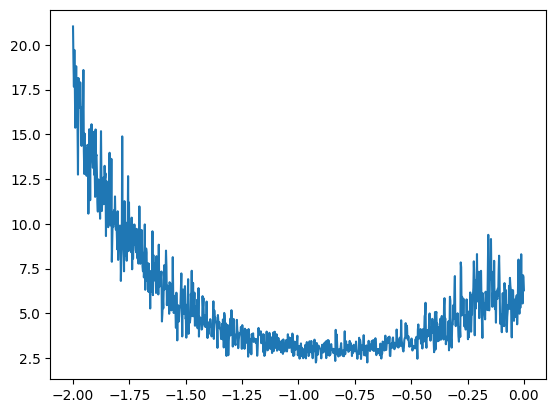

In [42]:
plt.plot(lri, lossi)

In [43]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()

6.3194146156311035

In [44]:
sum(p.nelement() for p in parameters)

3481

In [45]:
#train, dev/validation , test split --> 80,  10,  10

[Resume from here](https://youtu.be/TCH_1BHY58I?t=3340)

## Understanding Splitting data and training it.

In [46]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []

    for w in words:

        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random

random.seed(4)
random.shuffle(words)

n1 = int(0.8*len(words)) #80% of words
n2 = int(0.9*len(words)) #90% of words

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182359, 3]) torch.Size([182359])
torch.Size([22793, 3]) torch.Size([22793])
torch.Size([22994, 3]) torch.Size([22994])


In [47]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = C, W1, b1, W2, b2, 

In [48]:
for p in parameters:
    p.requires_grad = True 

In [49]:
#training on training dataset

for i in range(10000):
    # minibatching
    ix = torch.randint(0, Xtr.shape[0], (32, ))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()

    for p in parameters:
        p.data += -0.1* p.grad

In [50]:
loss.item()

2.3582444190979004

In [51]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.484541177749634

In [53]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.4784421920776367

In [54]:
sum(p.nelement() for p in parameters)

3481

## Scaling up the size of the Neural Network so that it can learn

In [55]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = C, W1, b1, W2, b2,

In [56]:
sum(p.nelement() for p in parameters)

10281

In [57]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [58]:
for p in parameters:
    p.requires_grad = True 

In [59]:
#training on training dataset

lri = []
lossi = []
stepi = []

for i in range(10000):
    # minibatching
    ix = torch.randint(0, Xtr.shape[0], (32, ))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # backward pass
    for p in parameters:
        p.grad = None
        
    
    loss.backward()

    lr = 0.1
    for p in parameters:
        p.data += -lr* p.grad
    stepi.append(i)
    lossi.append(loss.item())

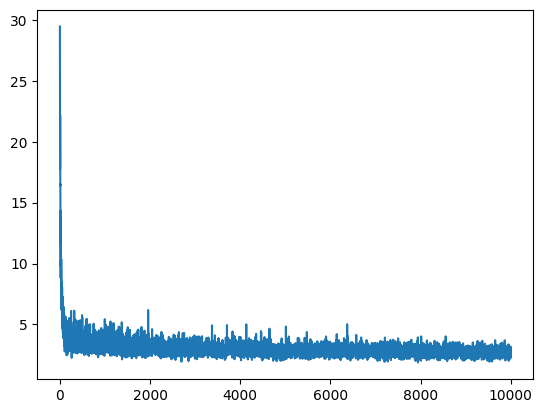

In [60]:
plt.plot(stepi, lossi)

In [61]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.6356451511383057

In [62]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.6438181400299072

[Resume here](https://youtu.be/TCH_1BHY58I?t=3891)

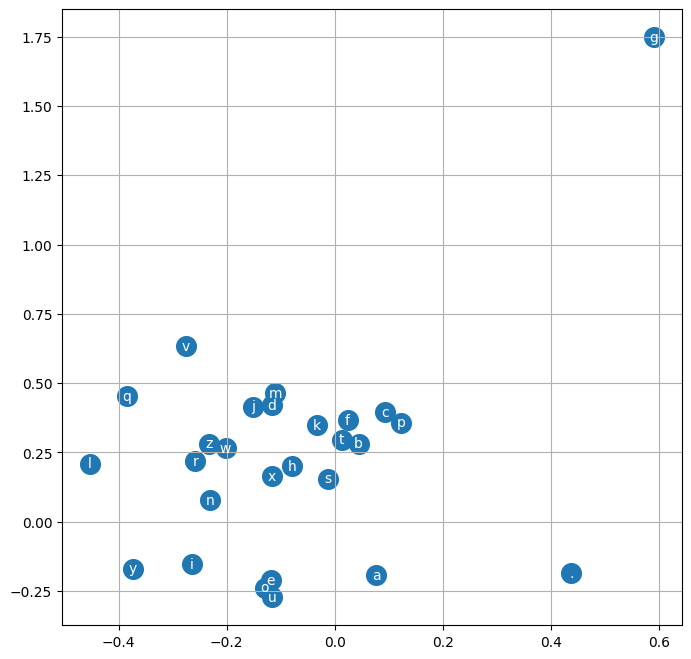

In [63]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

# Updating the dimensions of the neural network

In [64]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g) # updating the dimensions of the embedding
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = C, W1, b1, W2, b2,

In [65]:
sum(p.nelement() for p in parameters)

11897

In [66]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [67]:
for p in parameters:
    p.requires_grad = True 

In [68]:
lri = []
lossi = []
stepi = []

In [74]:
#training on training dataset

for i in range(200000):
    # minibatching
    ix = torch.randint(0, Xtr.shape[0], (32, ))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # backward pass
    for p in parameters:
        p.grad = None
        
    
    loss.backward()

    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr* p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())

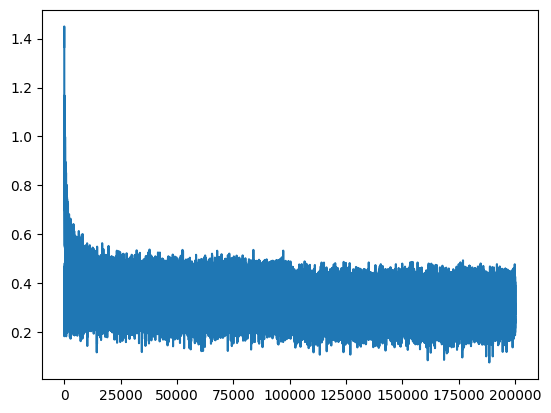

In [75]:
plt.plot(stepi, lossi)

In [76]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.0717427730560303

In [77]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.1320571899414062

In [78]:
emb = C[Xte]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yte)
loss.item()

2.1434507369995117

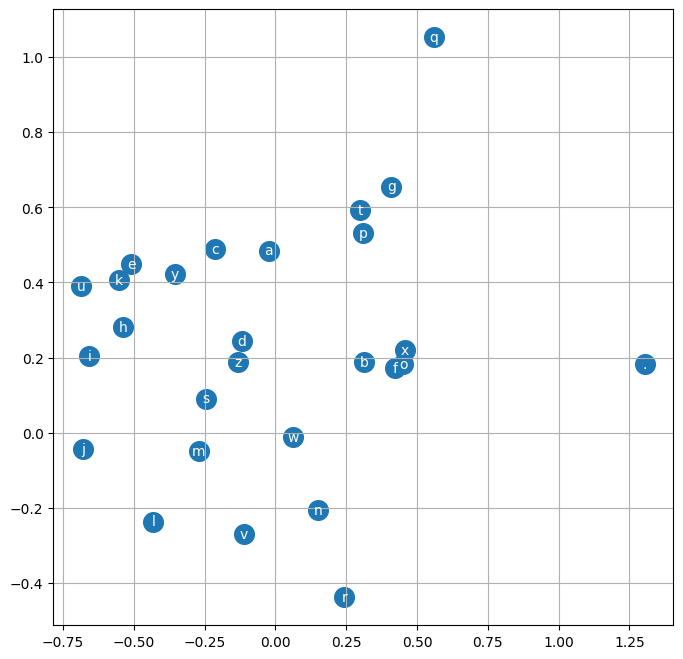

In [73]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

# Sampling data

In [79]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(10):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmah.
ambrilli.
kimri.
reity.
skansh.
emmahnee.
amesara.
areei.
nellara.
chaiir.
